# Analiza Treningu Sieci Neuronowej - MNIST

Ten notebook analizuje wyniki treningu sieci neuronowej do rozpoznawania cyfr MNIST.

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

# Ustawienia dla polskich znaków i stylu wykresów
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")
sns.set_palette("husl")

In [3]:
# Wczytanie danych z treningu
with open('backend/model/training_history.json', 'r') as f:
    history = json.load(f)

print("Dostępne metryki:", list(history.keys()))
print(f"Liczba epok: {len(history['loss'])}")
print(f"Końcowa dokładność treningowa: {history['accuracy'][-1]:.4f}")
print(f"Końcowa dokładność walidacyjna: {history['val_accuracy'][-1]:.4f}")

Dostępne metryki: ['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr']
Liczba epok: 18
Końcowa dokładność treningowa: 0.9939
Końcowa dokładność walidacyjna: 0.9961


## 1. Analiza Straty (Loss) podczas Treningu

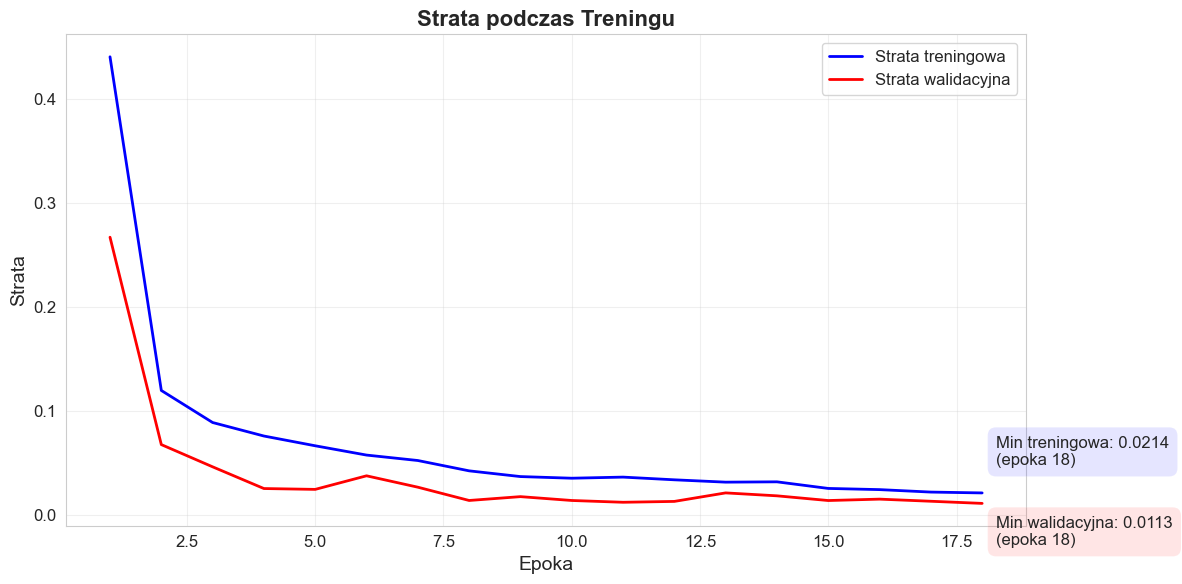

In [4]:
# Wykres straty treningowej i walidacyjnej
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

epochs = range(1, len(history['loss']) + 1)

ax.plot(epochs, history['loss'], 'b-', label='Strata treningowa', linewidth=2)
ax.plot(epochs, history['val_loss'], 'r-', label='Strata walidacyjna', linewidth=2)

ax.set_title('Strata podczas Treningu', fontsize=16, fontweight='bold')
ax.set_xlabel('Epoka', fontsize=14)
ax.set_ylabel('Strata', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

# Dodanie adnotacji z minimalnymi wartościami
min_train_loss = min(history['loss'])
min_val_loss = min(history['val_loss'])
min_train_epoch = history['loss'].index(min_train_loss) + 1
min_val_epoch = history['val_loss'].index(min_val_loss) + 1

ax.annotate(f'Min treningowa: {min_train_loss:.4f}\n(epoka {min_train_epoch})', 
            xy=(min_train_epoch, min_train_loss), xytext=(10, 20),
            textcoords='offset points', ha='left',
            bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.annotate(f'Min walidacyjna: {min_val_loss:.4f}\n(epoka {min_val_epoch})', 
            xy=(min_val_epoch, min_val_loss), xytext=(10, -30),
            textcoords='offset points', ha='left',
            bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

## 2. Analiza Dokładności (Accuracy) podczas Treningu

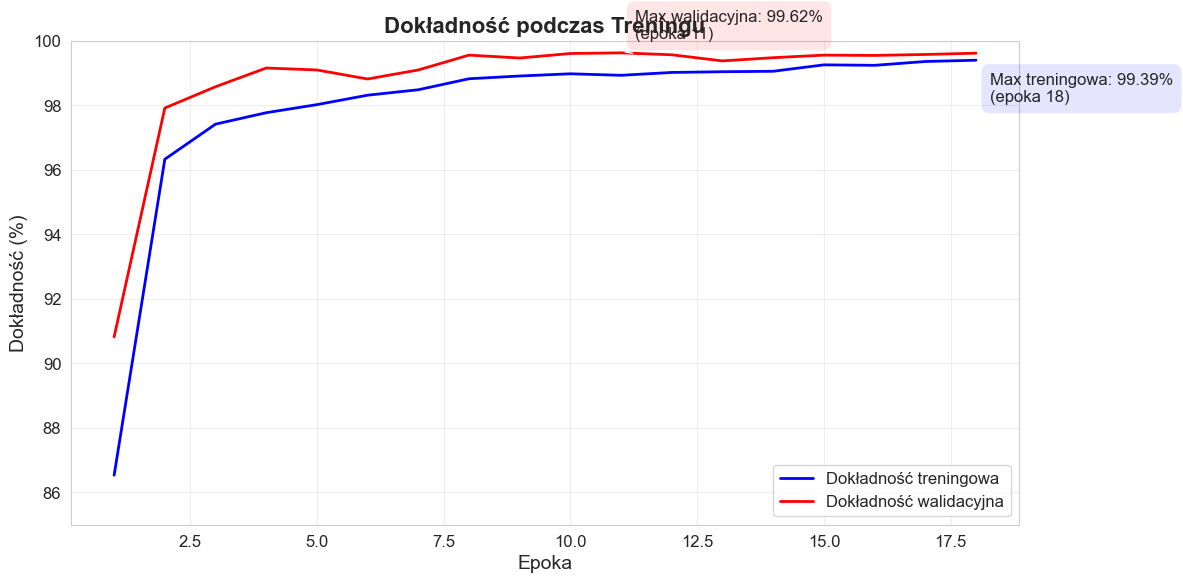

In [5]:
# Wykres dokładności treningowej i walidacyjnej
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(epochs, [acc * 100 for acc in history['accuracy']], 'b-', label='Dokładność treningowa', linewidth=2)
ax.plot(epochs, [acc * 100 for acc in history['val_accuracy']], 'r-', label='Dokładność walidacyjna', linewidth=2)

ax.set_title('Dokładność podczas Treningu', fontsize=16, fontweight='bold')
ax.set_xlabel('Epoka', fontsize=14)
ax.set_ylabel('Dokładność (%)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim(85, 100)

# Dodanie adnotacji z maksymalnymi wartościami
max_train_acc = max(history['accuracy'])
max_val_acc = max(history['val_accuracy'])
max_train_epoch = history['accuracy'].index(max_train_acc) + 1
max_val_epoch = history['val_accuracy'].index(max_val_acc) + 1

ax.annotate(f'Max treningowa: {max_train_acc*100:.2f}%\n(epoka {max_train_epoch})', 
            xy=(max_train_epoch, max_train_acc*100), xytext=(10, -30),
            textcoords='offset points', ha='left',
            bbox=dict(boxstyle='round,pad=0.5', fc='blue', alpha=0.1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

ax.annotate(f'Max walidacyjna: {max_val_acc*100:.2f}%\n(epoka {max_val_epoch})', 
            xy=(max_val_epoch, max_val_acc*100), xytext=(10, 10),
            textcoords='offset points', ha='left',
            bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.1),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

## 3. Porównanie Straty i Dokładności w Jednym Wykresie

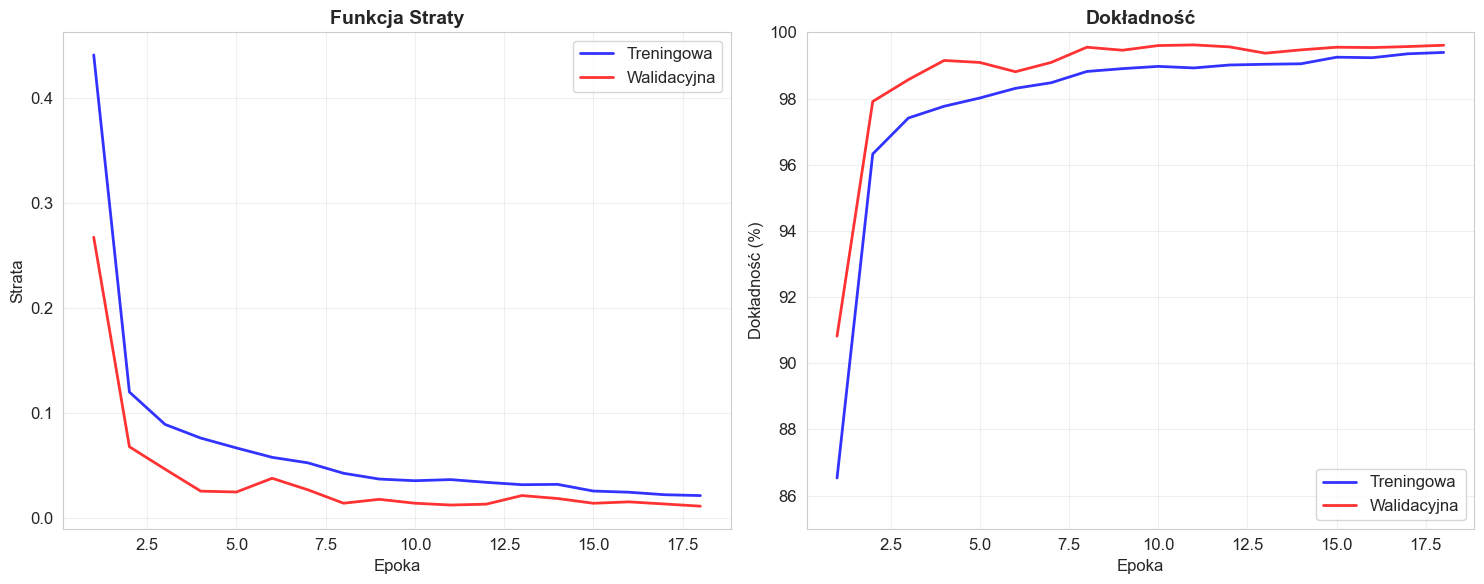

In [6]:
# Wykres kombinowany - strata i dokładność
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Strata
ax1.plot(epochs, history['loss'], 'b-', label='Treningowa', linewidth=2, alpha=0.8)
ax1.plot(epochs, history['val_loss'], 'r-', label='Walidacyjna', linewidth=2, alpha=0.8)
ax1.set_title('Funkcja Straty', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoka')
ax1.set_ylabel('Strata')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Dokładność
ax2.plot(epochs, [acc * 100 for acc in history['accuracy']], 'b-', label='Treningowa', linewidth=2, alpha=0.8)
ax2.plot(epochs, [acc * 100 for acc in history['val_accuracy']], 'r-', label='Walidacyjna', linewidth=2, alpha=0.8)
ax2.set_title('Dokładność', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoka')
ax2.set_ylabel('Dokładność (%)')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(85, 100)

plt.tight_layout()
plt.show()

## 4. Analiza Współczynnika Uczenia (Learning Rate)

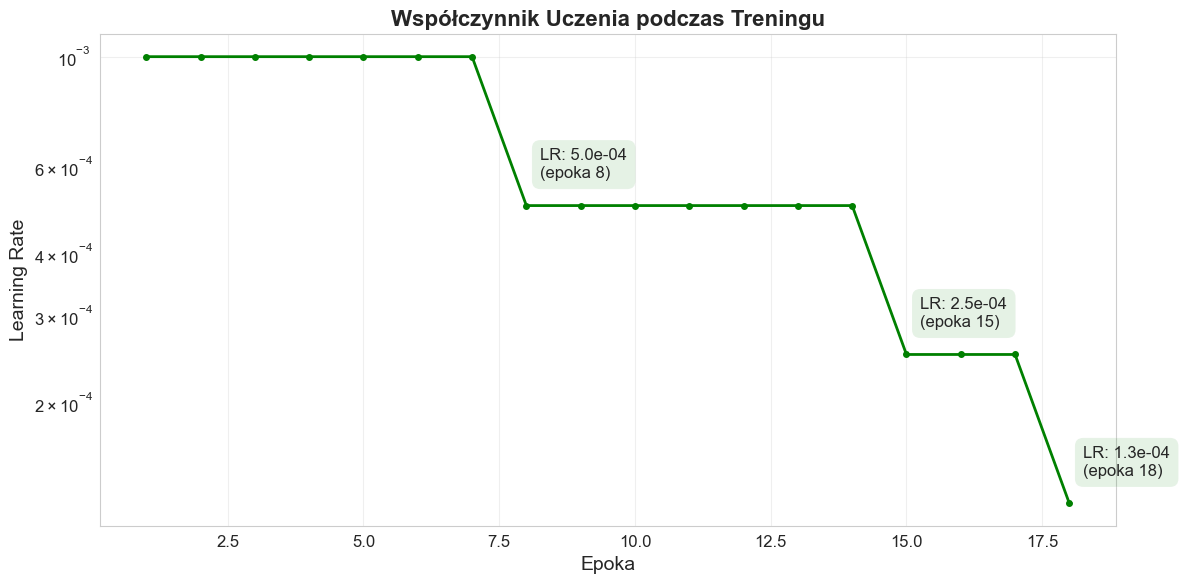

In [7]:
# Wykres współczynnika uczenia
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(epochs, history['lr'], 'g-', marker='o', linewidth=2, markersize=4)
ax.set_title('Współczynnik Uczenia podczas Treningu', fontsize=16, fontweight='bold')
ax.set_xlabel('Epoka', fontsize=14)
ax.set_ylabel('Learning Rate', fontsize=14)
ax.set_yscale('log')
ax.grid(True, alpha=0.3)

# Dodanie adnotacji dla zmian learning rate
lr_changes = []
for i in range(1, len(history['lr'])):
    if history['lr'][i] != history['lr'][i-1]:
        lr_changes.append((i+1, history['lr'][i]))

for epoch, lr in lr_changes:
    ax.annotate(f'LR: {lr:.1e}\n(epoka {epoch})', 
                xy=(epoch, lr), xytext=(10, 20),
                textcoords='offset points', ha='left',
                bbox=dict(boxstyle='round,pad=0.5', fc='green', alpha=0.1),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.tight_layout()
plt.show()

## 5. Analiza Tendencji i Stabilności Modelu

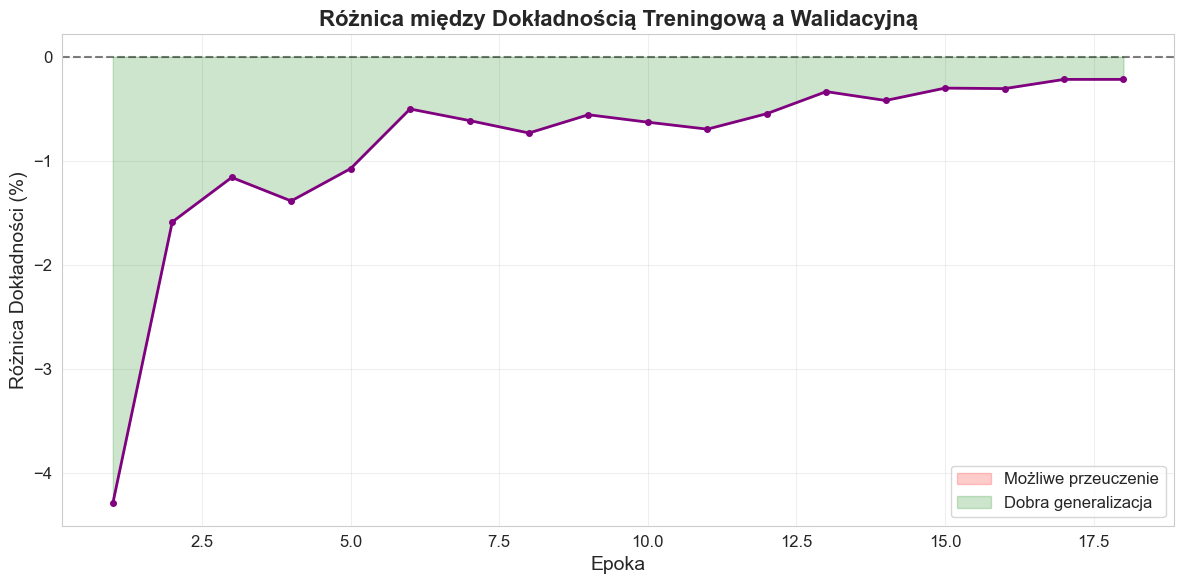

In [8]:
# Analiza przeuczenia (overfitting)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Różnica między dokładnością treningową a walidacyjną
accuracy_diff = [train - val for train, val in zip(history['accuracy'], history['val_accuracy'])]

ax.plot(epochs, [diff * 100 for diff in accuracy_diff], 'purple', linewidth=2, marker='o', markersize=4)
ax.axhline(y=0, color='black', linestyle='--', alpha=0.5)
ax.set_title('Różnica między Dokładnością Treningową a Walidacyjną', fontsize=16, fontweight='bold')
ax.set_xlabel('Epoka', fontsize=14)
ax.set_ylabel('Różnica Dokładności (%)', fontsize=14)
ax.grid(True, alpha=0.3)

# Dodanie obszarów dla interpretacji
ax.fill_between(epochs, 0, [diff * 100 for diff in accuracy_diff], 
                where=[diff > 0 for diff in accuracy_diff], 
                color='red', alpha=0.2, label='Możliwe przeuczenie')
ax.fill_between(epochs, 0, [diff * 100 for diff in accuracy_diff], 
                where=[diff <= 0 for diff in accuracy_diff], 
                color='green', alpha=0.2, label='Dobra generalizacja')

ax.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 6. Statystyki Podsumowujące

In [9]:
# Tabela z kluczowymi statystykami
import pandas as pd

stats = {
    'Metryka': [
        'Końcowa dokładność treningowa (%)',
        'Końcowa dokładność walidacyjna (%)',
        'Maksymalna dokładność walidacyjna (%)',
        'Końcowa strata treningowa',
        'Końcowa strata walidacyjna',
        'Minimalna strata walidacyjna',
        'Liczba epok',
        'Końcowy learning rate',
        'Średnia różnica dokładności (train-val) (%)'
    ],
    'Wartość': [
        f"{history['accuracy'][-1]*100:.2f}",
        f"{history['val_accuracy'][-1]*100:.2f}",
        f"{max(history['val_accuracy'])*100:.2f}",
        f"{history['loss'][-1]:.4f}",
        f"{history['val_loss'][-1]:.4f}",
        f"{min(history['val_loss']):.4f}",
        f"{len(history['loss'])}",
        f"{history['lr'][-1]:.1e}",
        f"{np.mean(accuracy_diff)*100:.2f}"
    ]
}

df_stats = pd.DataFrame(stats)
print("=" * 60)
print("PODSUMOWANIE WYNIKÓW TRENINGU")
print("=" * 60)
print(df_stats.to_string(index=False))
print("=" * 60)

PODSUMOWANIE WYNIKÓW TRENINGU
                                    Metryka Wartość
          Końcowa dokładność treningowa (%)   99.39
         Końcowa dokładność walidacyjna (%)   99.61
      Maksymalna dokładność walidacyjna (%)   99.62
                  Końcowa strata treningowa  0.0214
                 Końcowa strata walidacyjna  0.0113
               Minimalna strata walidacyjna  0.0113
                                Liczba epok      18
                      Końcowy learning rate 1.3e-04
Średnia różnica dokładności (train-val) (%)   -0.86


## 7. Zapis Wykresów do Plików

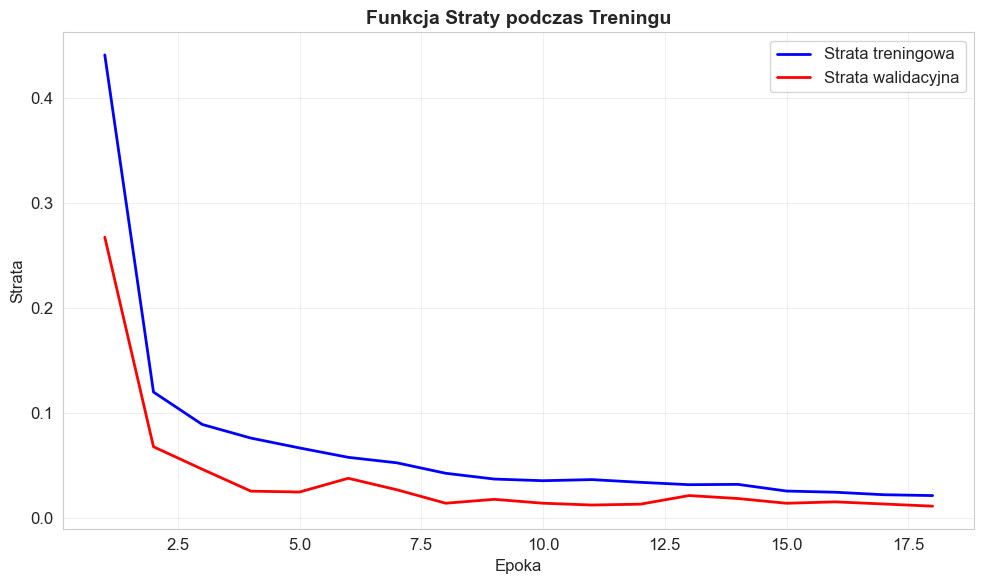

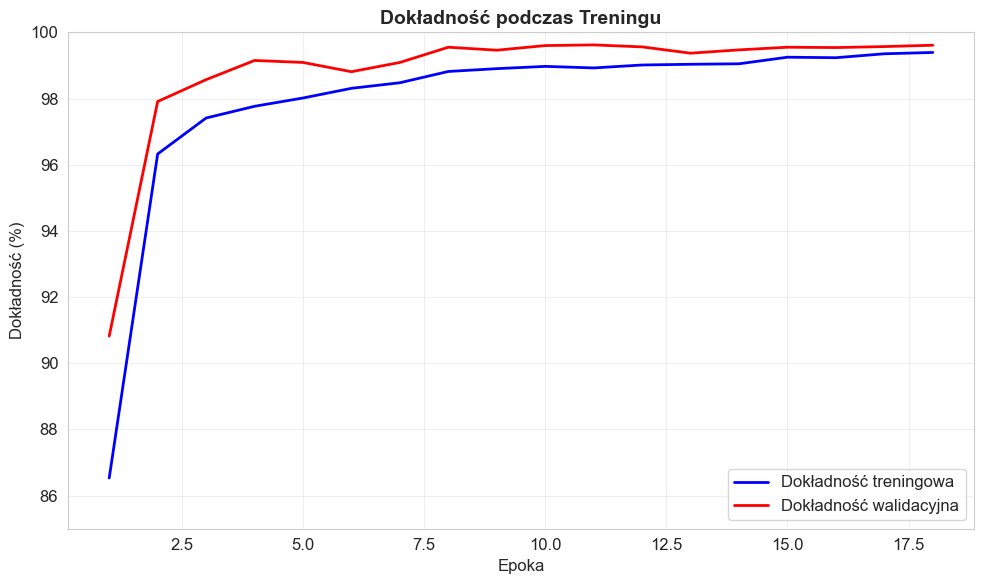

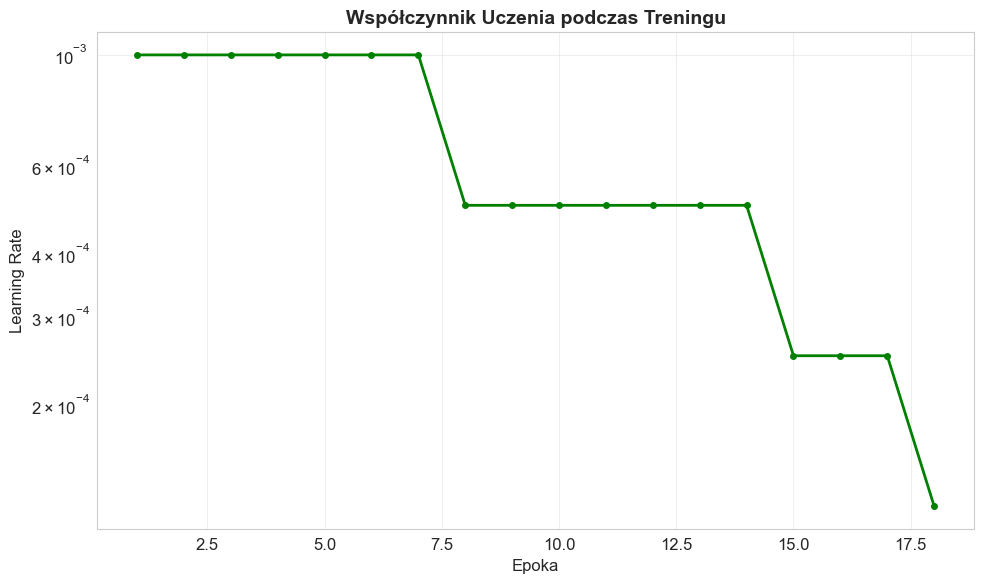

Wykresy zostały zapisane w folderze: plots\training_plots


In [10]:
# Stworzenie folderu na wykresy jeśli nie istnieje
plots_dir = Path('plots/training_plots')
plots_dir.mkdir(parents=True, exist_ok=True)

# Wykres 1: Strata
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(epochs, history['loss'], 'b-', label='Strata treningowa', linewidth=2)
ax.plot(epochs, history['val_loss'], 'r-', label='Strata walidacyjna', linewidth=2)
ax.set_title('Funkcja Straty podczas Treningu', fontsize=14, fontweight='bold')
ax.set_xlabel('Epoka')
ax.set_ylabel('Strata')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(plots_dir / 'training_loss.png', dpi=300, bbox_inches='tight')
plt.show()

# Wykres 2: Dokładność
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(epochs, [acc * 100 for acc in history['accuracy']], 'b-', label='Dokładność treningowa', linewidth=2)
ax.plot(epochs, [acc * 100 for acc in history['val_accuracy']], 'r-', label='Dokładność walidacyjna', linewidth=2)
ax.set_title('Dokładność podczas Treningu', fontsize=14, fontweight='bold')
ax.set_xlabel('Epoka')
ax.set_ylabel('Dokładność (%)')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_ylim(85, 100)
plt.tight_layout()
plt.savefig(plots_dir / 'training_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

# Wykres 3: Learning Rate
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.plot(epochs, history['lr'], 'g-', marker='o', linewidth=2, markersize=4)
ax.set_title('Współczynnik Uczenia podczas Treningu', fontsize=14, fontweight='bold')
ax.set_xlabel('Epoka')
ax.set_ylabel('Learning Rate')
ax.set_yscale('log')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(plots_dir / 'learning_rate.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Wykresy zostały zapisane w folderze: {plots_dir}")